In [11]:
import cv2
from tensorflow import *
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks, layers, metrics, models, optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.utils as image

In [12]:
train_path = "archive/chest_xray/train"
val_path = "archive/chest_xray/val"
test_path = "archive/chest_xray/test"

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = "binary",
    color_mode = "grayscale"
)

validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = "binary",
    color_mode = "grayscale"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = "binary",
    color_mode = "grayscale"
)

train_num = train_generator.samples
val_num = validation_generator.samples

for image, label in train_generator:
    print(image.shape)
    print(label.shape)
    break

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
(32, 128, 128, 1)
(32,)


In [15]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation = "relu", input_shape = (128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["acc"]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)       

In [16]:
epochs = 30

history = model.fit(
    train_generator,
    steps_per_epoch = train_num / batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = val_num / batch_size
)

Epoch 1/30
163/163 [==============================] - 153s 927ms/step - loss: 0.5766 - acc: 0.7408 - val_loss: 0.6858 - val_acc: 0.5962
Epoch 2/30
163/163 [==============================] - 163s 1s/step - loss: 0.5021 - acc: 0.7387 - val_loss: 0.6623 - val_acc: 0.5881
Epoch 3/30
163/163 [==============================] - 172s 1s/step - loss: 0.4730 - acc: 0.7460 - val_loss: 0.7158 - val_acc: 0.6266
Epoch 4/30
163/163 [==============================] - 176s 1s/step - loss: 0.4540 - acc: 0.7627 - val_loss: 0.6446 - val_acc: 0.6218
Epoch 5/30
163/163 [==============================] - 174s 1s/step - loss: 0.4314 - acc: 0.7799 - val_loss: 0.6485 - val_acc: 0.6314
Epoch 6/30
163/163 [==============================] - 225s 1s/step - loss: 0.3915 - acc: 0.8173 - val_loss: 0.4851 - val_acc: 0.7676
Epoch 7/30
163/163 [==============================] - 152s 930ms/step - loss: 0.3641 - acc: 0.8257 - val_loss: 0.4383 - val_acc: 0.8093
Epoch 8/30
163/163 [==============================] - 159s 975m

<Figure size 640x480 with 0 Axes>

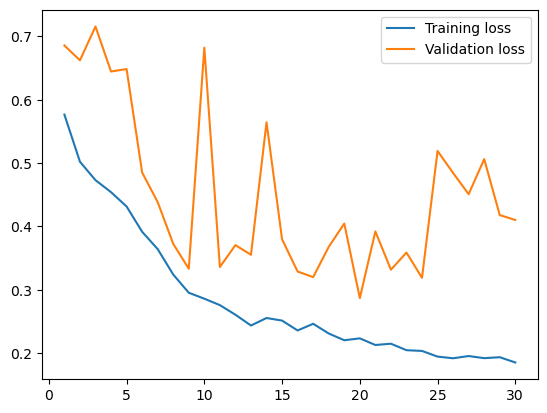

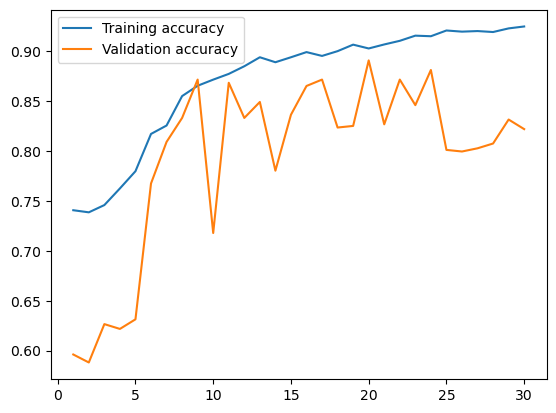

<Figure size 640x480 with 0 Axes>

In [19]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.legend()
plt.figure()

plt.plot(epochs, acc, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.legend()
plt.figure()